##  **Ensemble ML Modelling to classify Real/Fake jobs**

**By Varad Jadhav**

# Importing Required Libraries

In [1]:
import pandas as pd #data processing
import numpy as np #mathematical operations on arrays
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import warnings
warnings.filterwarnings('ignore')

In [3]:
#getting data from '/content/fake_job_postings.csv'
data = pd.read_csv('/content/fake_job_postings.csv',engine='python')
data.head(10)

job_id                                      title               location  \
0       1                           Marketing Intern       US, NY, New York   
1       2  Customer Service - Cloud Video Production         NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)          US, IA, Wever   
3       4          Account Executive - Washington DC     US, DC, Washington   
4       5                        Bill Review Manager     US, FL, Fort Worth   
5       6                           Accounting Clerk               US, MD,    
6       7                      Head of Content (m/f)         DE, BE, Berlin   
7       8           Lead Guest Service Specialist     US, CA, San Francisco   
8       9                                 HP BSM SME      US, FL, Pensacola   
9      10    Customer Service Associate - Part Time         US, AZ, Phoenix   

   department salary_range                                    company_profile  \
0   Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1     Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2         NaN          NaN  Valor Services provides Workforce Solutions th...   
3       Sales          NaN  Our passion for improving quality of life thro...   
4         NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   
5         NaN          NaN                                                NaN   
6  ANDROIDPIT  20000-28000  Founded in 2009, the Fonpit AG rose with its i...   
7         NaN          NaN  Airenvy’s mission is to provide lucrative yet ...   
8         NaN          NaN  Solutions3 is a woman-owned small business who...   
9         NaN          NaN  Novitex Enterprise Solutions, formerly Pitney ...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   
5  Job OverviewApex is an environmental consultin...   
6  Your Responsibilities: Manage the English-spea...   
7  Who is Airenvy?Hey there! We are seasoned entr...   
8  Implementation/Configuration/Testing/Training ...   
9  The Customer Service Associate will be based i...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   
5                                                NaN   
6  Your Know-How:                                ...   
7  Experience with CRM software, live chat, and p...   
8  MUST BE A US CITIZEN.An active TS/SCI clearanc...   
9  Minimum Requirements:Minimum of 6 months custo...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   
5                                                NaN              0   
6  Your Benefits: Being part of a fast-growing co...              0   
7  Competitive Pay. You'll be able to eat steak e...              0   
8                                                NaN              0   
9                                                NaN              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2  

In [4]:
#characteristics of data
print(data.shape)
print(data.info())
data.columns

(17880, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  obje

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

(array([5.00000e-01, 2.01500e+02, 4.02500e+02, 6.03500e+02, 8.04500e+02,
        1.00550e+03, 1.20650e+03, 1.40750e+03, 1.60850e+03, 1.80950e+03,
        2.01050e+03, 2.21150e+03, 2.41250e+03, 2.61350e+03, 2.81450e+03,
        3.01550e+03, 3.21650e+03, 3.41750e+03, 3.61850e+03, 3.81950e+03,
        4.02050e+03, 4.22150e+03, 4.42250e+03, 4.62350e+03, 4.82450e+03,
        5.02550e+03, 5.22650e+03, 5.42750e+03, 5.62850e+03, 5.82950e+03,
        6.03050e+03, 6.23150e+03, 6.43250e+03, 6.63350e+03, 6.83450e+03,
        7.03550e+03, 7.23650e+03, 7.43750e+03, 7.63850e+03, 7.83950e+03,
        8.04050e+03, 8.24150e+03, 8.44250e+03, 8.64350e+03, 8.84450e+03,
        9.04550e+03, 9.24650e+03, 9.44750e+03, 9.64850e+03, 9.84950e+03,
        1.00505e+04, 1.02515e+04, 1.04525e+04, 1.06535e+04, 1.08545e+04,
        1.10555e+04, 1.12565e+04, 1.14575e+04, 1.16585e+04, 1.18595e+04,
        1.20605e+04, 1.22615e+04, 1.24625e+04, 1.26635e+04, 1.28645e+04,
        1.30655e+04, 1.32665e+04, 1.34675e+04, 1.36

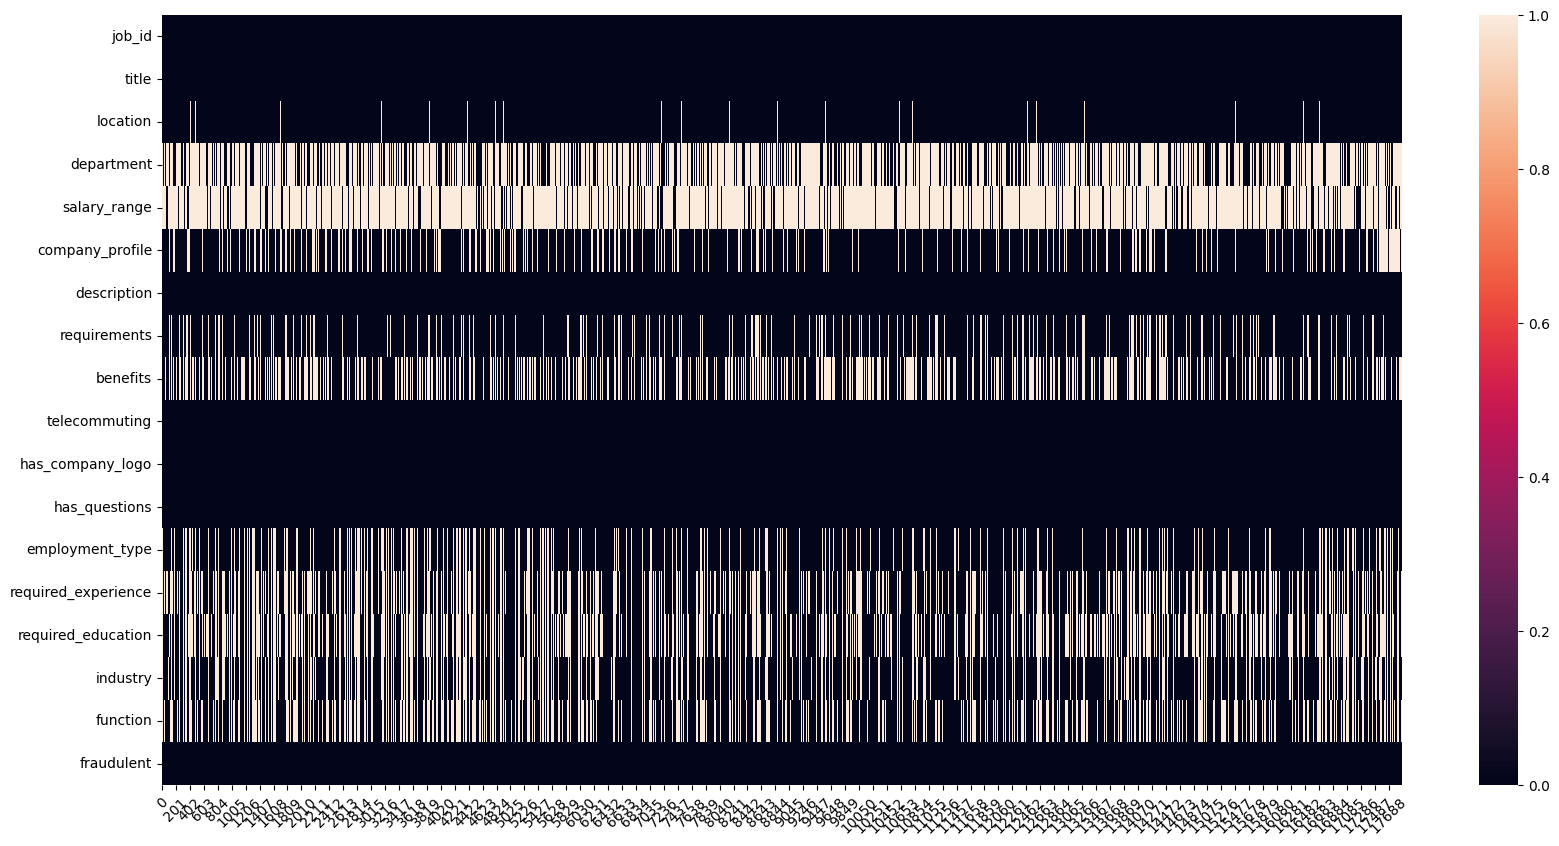

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna().transpose())
plt.xticks(rotation=45)

 Which industry has the most number of fake jobs?

In [12]:
data[data['fraudulent']==1]['industry'].value_counts().to_frame()

industry
Oil & Energy                      109
Accounting                         57
Hospital & Health Care             51
Marketing and Advertising          45
Financial Services                 35
...                               ...
Civic & Social Organization         1
Public Safety                       1
Wholesale                           1
Consumer Goods                      1
Online Media                        1

[62 rows x 1 columns]

# Exploratory data analysis and Data Cleaning

In [13]:
#Removing nan
data.function.fillna(data.department,inplace=True)
#Removing undesired columns
data.drop(columns=['job_id','department'],inplace=True)

In [14]:
#Handling missing values for text data and categorical data
text=['title','benefits','company_profile','location','description','requirements','fraudulent']
categ=['employment_type','required_experience','required_education','industry','function','telecommuting','has_company_logo','has_questions','fraudulent']

In [15]:
#filling nan in categorical data
categ_cols=data[categ].fillna('None')
categ_cols

employment_type required_experience required_education  \
0               Other          Internship               None   
1           Full-time      Not Applicable               None   
2                None                None               None   
3           Full-time    Mid-Senior level  Bachelor's Degree   
4           Full-time    Mid-Senior level  Bachelor's Degree   
...               ...                 ...                ...   
17875       Full-time    Mid-Senior level               None   
17876       Full-time    Mid-Senior level  Bachelor's Degree   
17877       Full-time                None               None   
17878        Contract      Not Applicable       Professional   
17879       Full-time    Mid-Senior level               None   

                        industry              function  telecommuting  \
0                           None             Marketing              0   
1      Marketing and Advertising      Customer Service              0   
2                           None                  None              0   
3              Computer Software                 Sales              0   
4         Hospital & Health Care  Health Care Provider              0   
...                          ...                   ...            ...   
17875          Computer Software                 Sales              0   
17876                   Internet   Accounting/Auditing              0   
17877                       None                  None              0   
17878             Graphic Design                Design              0   
17879          Computer Software           Engineering              0   

       has_company_logo  has_questions  fraudulent  
0                     1              0           0  
1                     1              0           0  
2                     1              0           0  
3                     1              0           0  
4                     1              1           0  
...                 ...            ...         ...  
17875                 1              1           0  
17876                 1              1           0  
17877                 0              0           0  
17878                 0              1           0  
17879                 1              1           0  

[17880 rows x 9 columns]

In [16]:
#filling nan in text data
txt_cols=data[text].fillna(' ')
txt_cols

title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Application Developers   

                                                benefits  \
0                                                          
1      What you will get from usThrough being part of...   
2                                                          
3      Our culture is anything but corporate—we have ...   
4                                  Full Benefits Offered   
...                                                  ...   
17875  What can you expect from us?We have an open cu...   
17876  Health &amp; WellnessMedical planPrescription ...   
17877                                                      
17878  Competitive salary (compensation will be based...   
17879                                                      

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      Valor Services provides Workforce Solutions th...   
3      Our passion for improving quality of life thro...   
4      SpotSource Solutions LLC is a Global Human Cap...   
...                                                  ...   
17875  Vend is looking for some awesome new talent to...   
17876  WebLinc is the e-commerce platform and service...   
17877  We Provide Full Time Permanent Positions for m...   
17878                                                      
17879  Vend is looking for some awesome new talent to...   

                   location  \
0          US, NY, New York   
1            NZ, , Auckland   
2             US, IA, Wever   
3        US, DC, Washington   
4        US, FL, Fort Worth   
...                     ...   
17875       CA, ON, Toronto   
17876  US, PA, Philadelphia   
17877       US, TX, Houston   
17878         NG, LA, Lagos   
17879     NZ, N, Wellington   

                                             description  \
0      Food52, a fast-growing, James Beard Award-winn...   
1      Organised - Focused - Vibrant - Awesome!Do you...   
2      Our client, located in Houston, is actively se...   
3      THE COMPANY: ESRI – Environmental Systems Rese...   
4      JOB TITLE: Itemization Review ManagerLOCATION:...   
...                                                  ...   
17875  Just in case this is the first time you’ve vis...   
17876  The Payroll Accountant will focus primarily on...   
17877  Experienced Project Cost Control Staff Enginee...   
17878  Nemsia Studios is looking for an experienced v...   
17879  Who are we?Vend is an award winning web based ...   

                                            requirements  fraudulent  
0      Experience with content management systems a m...           0  
1      What we expect from you:Your key responsibilit...           0  
2      Implement pre-commissioning and commissioning ...           0  
3      EDUCATION: Bachelor’s or Master’s in GIS, busi...           0  
4      QUALIFICATIONS:RN license in the State of Texa...           0  
...                                                  ...         ...  
17875  To ace this role you:Will eat comprehensive St...           0  
17876  - B.A. or B.S. in Accounting- Desire to have f...           0  
17877  At least 12 years professional experience.Abil...           0  
17878  1. Must be fluent in the latest versions of Co...           0  
17879  We wan

 What are the most common title used in jobs in the US?

In [17]:
data['country']=txt_cols['location'].apply(lambda x:x.split(',')[0])
data[data['country']=='US']['title'].value_counts().to_frame()

title
English Teacher Abroad                                295
Graduates: English Teacher Abroad (Conversational)    144
Customer Service Associate                            136
English Teacher Abroad                                 89
English Teacher Abroad (Conversational)                83
...                                                   ...
  Mechanical Engineering Manager                        1
Pipe Foreman                                            1
Graphic Designer / Large Format printer operator        1
Dealer Service Representative                           1
Project Cost Control Staff Engineer - Cost Cont...      1

[6476 rows x 1 columns]

Which department or function has high-paying jobs in the UK?

In [19]:
newData = data[data['country']=='GB']#greate briton
newData.dropna(subset='salary_range',inplace=True)
newData['avg_salary'] = newData['salary_range'].apply(lambda x:sum(np. array(x.split('-')).astype('i')))
newData.groupby('function')['avg_salary'].mean().to_frame()

avg_salary
function                             
Accounting/Auditing     102366.666667
Administrative          102664.428571
Advertising              69000.000000
Art/Creative             54190.181818
Business Analyst         27000.000000
Business Development     61086.360000
Consulting               55666.666667
Creative                 85000.000000
Customer Service         44769.904762
Data Analyst             58066.666667
Design                   68980.833333
Distribution             36750.000000
E-Commerce               72500.000000
Education                36333.333333
Engineering             104308.728814
Fashion:Internships      28000.000000
Finance                  50666.666667
Financial Analyst       112000.000000
General Business        102333.333333
Health Care Provider     27502.666667
Healthcare               45000.000000
Human Resources          56650.000000
Information Technology   78136.176471
Legal                    65000.000000
Management               66668.750000
Marketing                60944.444444
Operations               75000.000000
Other                    42100.000000
Product Management      105000.000000
Production               48000.000000
Project Management       60208.562500
Public Relations         63000.000000
Purchasing               38000.000000
Quality Assurance        85000.000000
Research                100000.000000
Sales                    59024.891304
Strategy/Planning        91000.000000
Supply Chain             70000.000000
TH02                     36000.000000
Training                 74500.000000
Writing/Editing          50000.000000

In [20]:
#dropping undesired column because of anourmous number of missing values
data.drop(['salary_range'],axis=1,inplace=True)

In [21]:
#getting 'country' form 'location'
categ_cols['country']=txt_cols['location'].apply(lambda x:x.split(',')[0])
countries=categ_cols['country'].value_counts().to_frame()
countries

country
US    10656
GB     2384
GR      940
CA      457
DE      383
..      ...
SI        1
CO        1
SD        1
UG        1
KH        1

[91 rows x 1 columns]

([<matplotlib.patches.Wedge at 0x78384d26c280>,
 [Text(-1.0872905906487755, 0.16673083544034975, 'Real Job'),
  Text(1.0872905828435406, -0.16673088634009564, 'Fake Job')],
 [Text(-0.593067594899332, 0.09094409205837257, '95%'),
  Text(0.5930675906419312, -0.09094411982187034, '5%')])

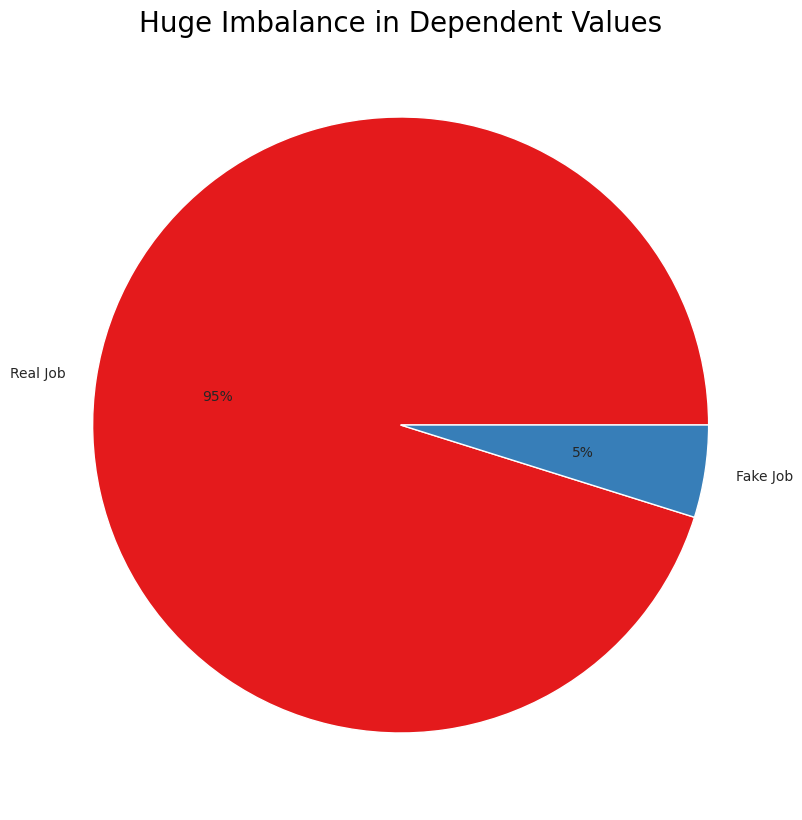

In [22]:
colors = sns.color_palette('Set1')[0:10]
plt.figure(figsize=(12,10))
plt.title('Huge Imbalance in Dependent Values',size=20)
sns.set_style('whitegrid')
plt.pie(data['fraudulent'].value_counts(),labels=['Real Job','Fake Job'],colors=colors,autopct='%.0f%%')

In [23]:
fakejobs=categ_cols[categ_cols['fraudulent']==1]
realjobs=categ_cols[categ_cols['fraudulent']==0]

# Visualizing data

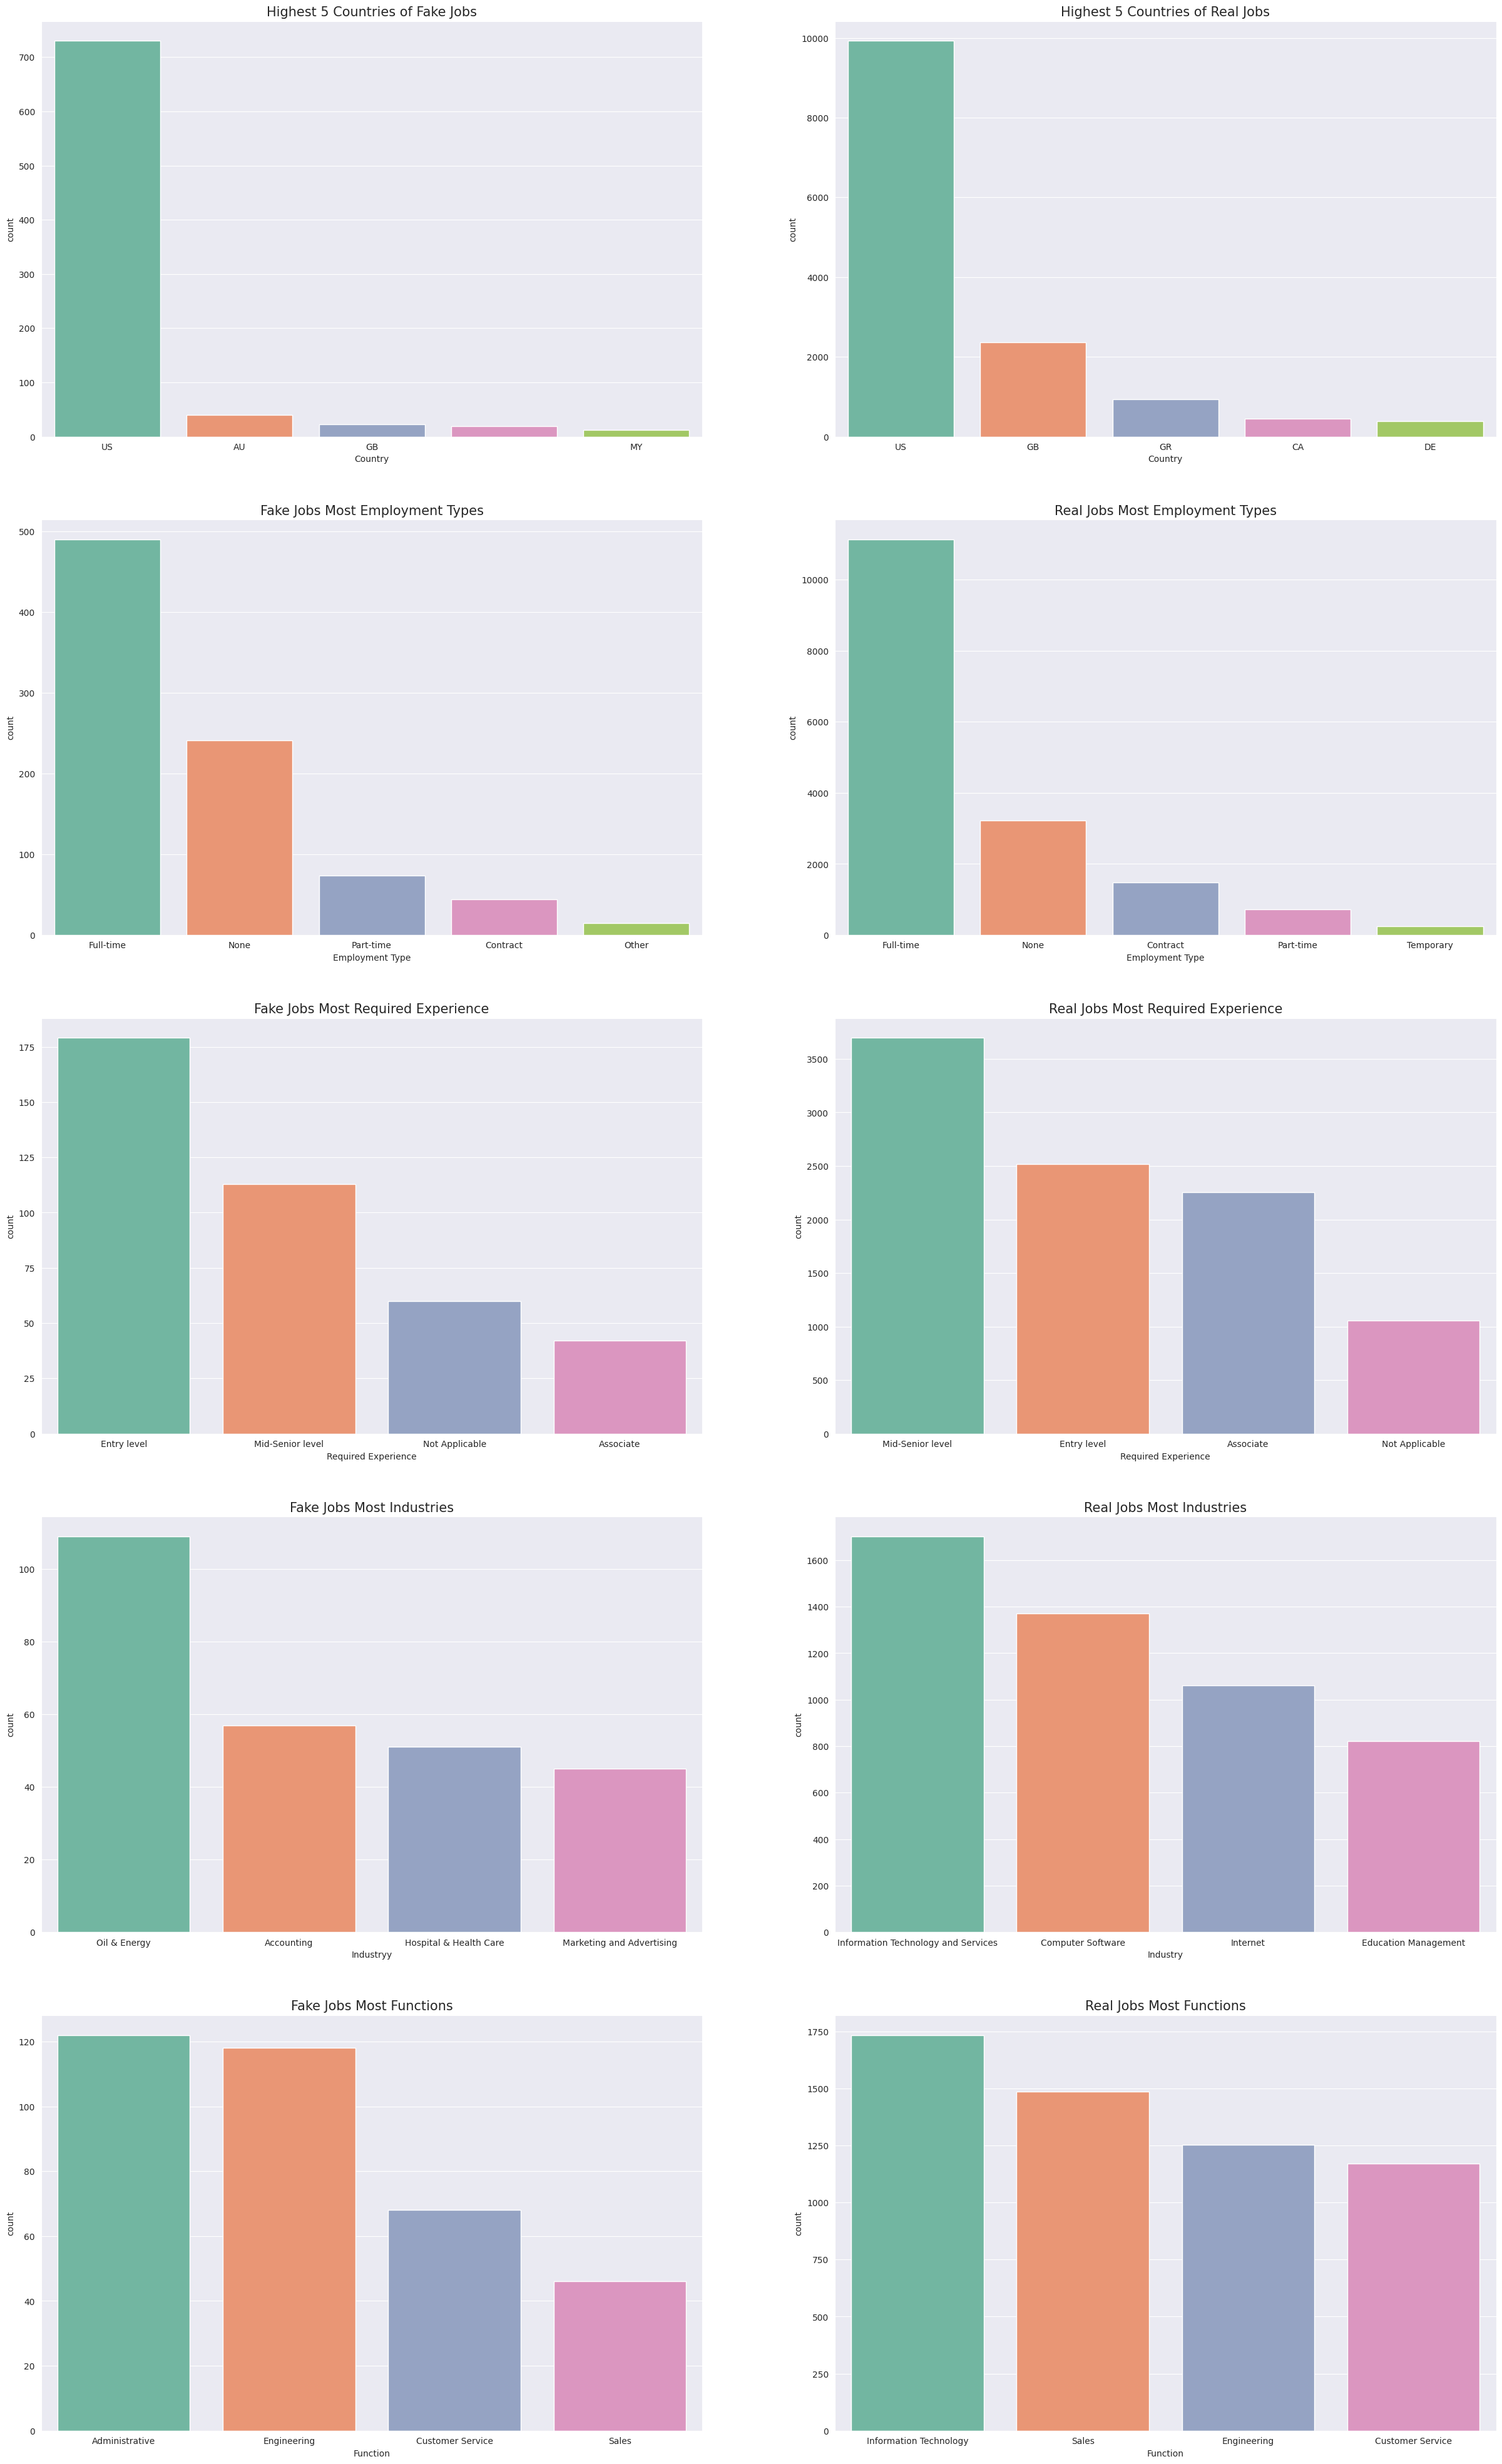

In [24]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(5, 2, figsize=(30, 50))
sns.countplot(data=fakejobs, x='country', palette='Set2',order=fakejobs['country'].value_counts().index[:5], ax=axes[0, 0])
sns.countplot(data=realjobs, x='country', palette='Set2',order=realjobs['country'].value_counts().index[:5], ax=axes[0, 1])
axes[0, 0].set_title('Highest 5 Countries of Fake Jobs', fontsize=15)
axes[0, 1].set_title('Highest 5 Countries of Real Jobs', fontsize=15)
axes[0, 0].set_xlabel('Country')
axes[0, 1].set_xlabel('Country')

sns.countplot(data=fakejobs,x='employment_type',palette='Set2',order = fakejobs['employment_type'].value_counts().index[:5],ax=axes[1,0])
sns.countplot(data=realjobs,x='employment_type',palette='Set2',order = realjobs['employment_type'].value_counts().index[:5],ax=axes[1,1])
axes[1,0].set_title('Fake Jobs Most Employment Types',fontsize=15)
axes[1,1].set_title('Real Jobs Most Employment Types',fontsize=15)
axes[1,0].set_xlabel('Employment Type')
axes[1,1].set_xlabel('Employment Type')


sns.countplot(data=fakejobs,x='required_experience',palette='Set2',order = fakejobs['required_experience'].value_counts().index[1:5],ax=axes[2,0])
sns.countplot(data=realjobs,x='required_experience',palette='Set2',order = realjobs['required_experience'].value_counts().index[1:5],ax=axes[2,1])
axes[2,0].set_title('Fake Jobs Most Required Experience',fontsize=15)
axes[2,1].set_title('Real Jobs Most Required Experience',fontsize=15)
axes[2,0].set_xlabel('Required Experience')
axes[2,1].set_xlabel('Required Experience')

sns.countplot(data=fakejobs,x='industry',palette='Set2',order = fakejobs['industry'].value_counts().index[1:5],ax=axes[3,0])
sns.countplot(data=realjobs,x='industry',palette='Set2',order = realjobs['industry'].value_counts().index[1:5],ax=axes[3,1])
axes[3,0].set_title('Fake Jobs Most Industries',fontsize=15)
axes[3,1].set_title('Real Jobs Most Industries',fontsize=15)
axes[3,0].set_xlabel('Industryy')
axes[3,1].set_xlabel('Industry')

sns.countplot(data=fakejobs,x='function',palette='Set2',order = fakejobs['function'].value_counts().index[1:5],ax=axes[4,0])
sns.countplot(data=realjobs,x='function',palette='Set2',order = realjobs['function'].value_counts().index[1:5],ax=axes[4,1])
axes[4,0].set_title('Fake Jobs Most Functions',fontsize=15)
axes[4,1].set_title('Real Jobs Most Functions',fontsize=15)
axes[4,0].set_xlabel('Function')
axes[4,1].set_xlabel('Function')
plt.show()

Text(0.5, 0, '')

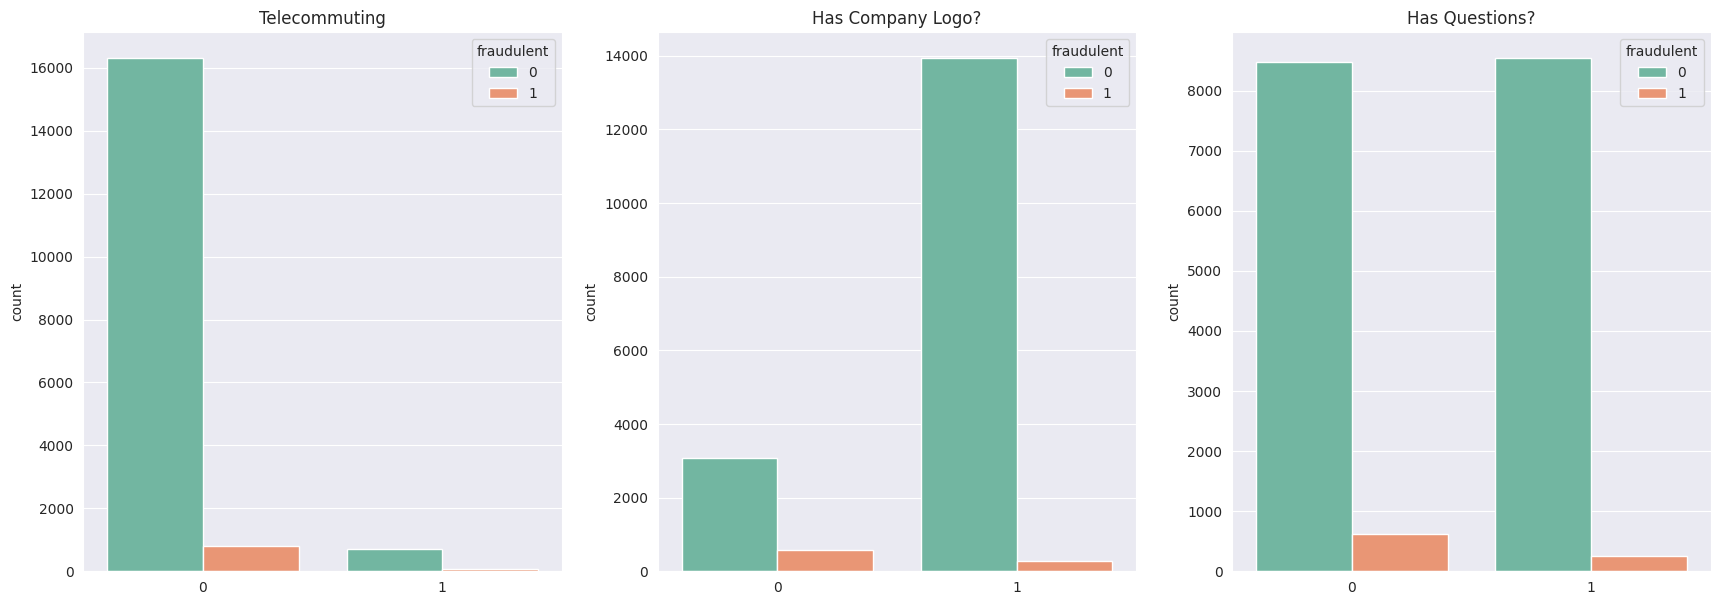

In [25]:
fig,axes=plt.subplots(1,3,figsize=(21,7))
sns.countplot(x='telecommuting', data=categ_cols, hue='fraudulent', palette='Set2',ax=axes[0])
sns.countplot(x='has_company_logo', data=categ_cols, hue='fraudulent', palette='Set2',ax=axes[1])
sns.countplot(x='has_questions', data=categ_cols, hue='fraudulent', palette='Set2',ax=axes[2])

axes[0].set_title('Telecommuting',fontsize=12)
axes[1].set_title('Has Company Logo?',fontsize=12)
axes[2].set_title('Has Questions?',fontsize=12)

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')

In [26]:
# 'country' is used rather than 'location' column as a category data
txt_cols.drop(columns=['location'],inplace=True)

# Natural Language Processing

Cleaning text, removing stop words and stemming basically NLP

In [27]:
#importing libraries for handling text
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
stemmer=PorterStemmer()
stop=set(stopwords.words('english'))

In [29]:
#function will check for the words in each cell and reject stopwords and do stemming on other words
def column_clean(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z\s*]','',text)
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
    return (text)

In [30]:
# Splitting Text Data to Fraud or Not Fraud
txt_fraud=txt_cols[txt_cols['fraudulent']==1]
txt_not_fraud=txt_cols[txt_cols['fraudulent']==0]

In [31]:
txt_fraud['title']=txt_fraud['title'].apply(column_clean)
txt_not_fraud['title']=txt_not_fraud['title'].apply(column_clean)

In [33]:
#joins the array of words to a single textual sentence with spaces
def combine(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

Commonly used words in every text column

In [34]:
fraud_titles = txt_fraud['title'].apply(combine)
not_fraud_titles = txt_not_fraud['title'].apply(combine)

In [35]:
fraud_titles_corpus=fraud_titles.values.tolist()
not_fraud_titles_corpus=not_fraud_titles.values.tolist()

In [36]:
fraud_titles_corpus=' '.join(fraud_titles_corpus)
not_fraud_titles_corpus=' '.join(not_fraud_titles_corpus)

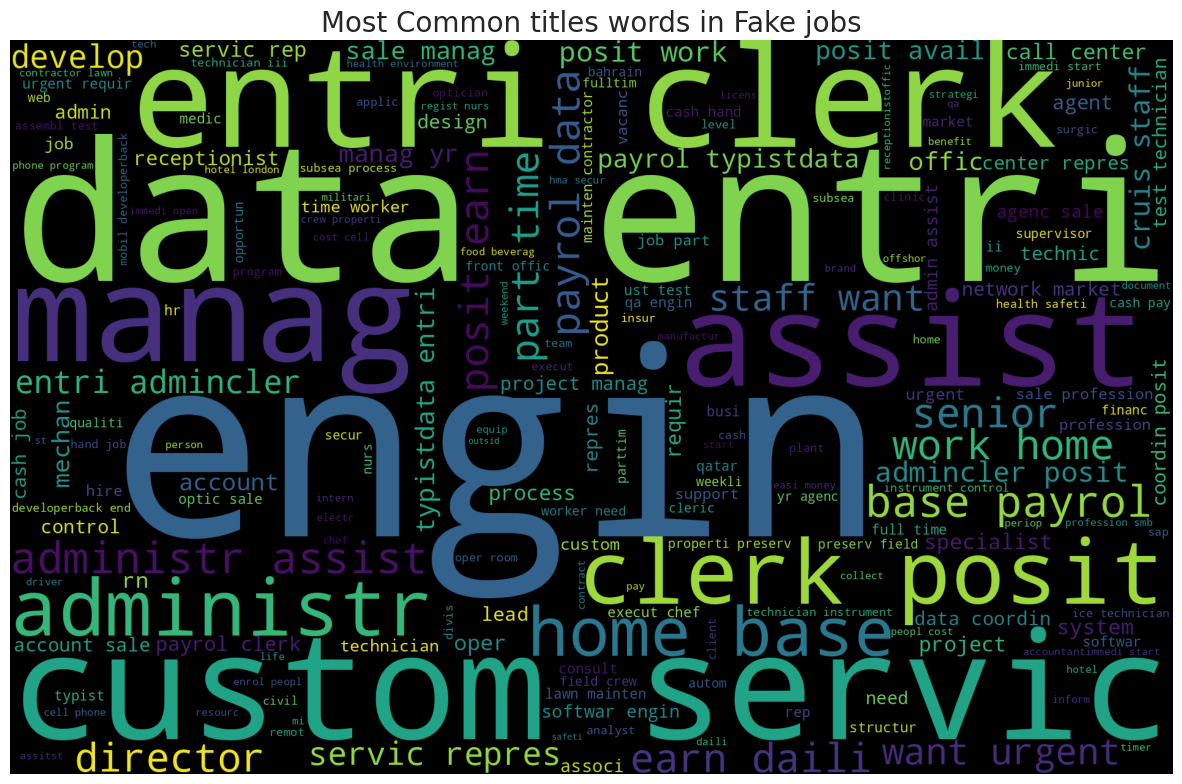

In [39]:
plt.figure(figsize=(15,10))
wordcloudfraud=WordCloud(width = 1900 , height = 1200 , background_color='black').generate(fraud_titles_corpus)
plt.axis('off')
plt.title('Most Common titles words in Fake jobs',size=20)
plt.imshow(wordcloudfraud)

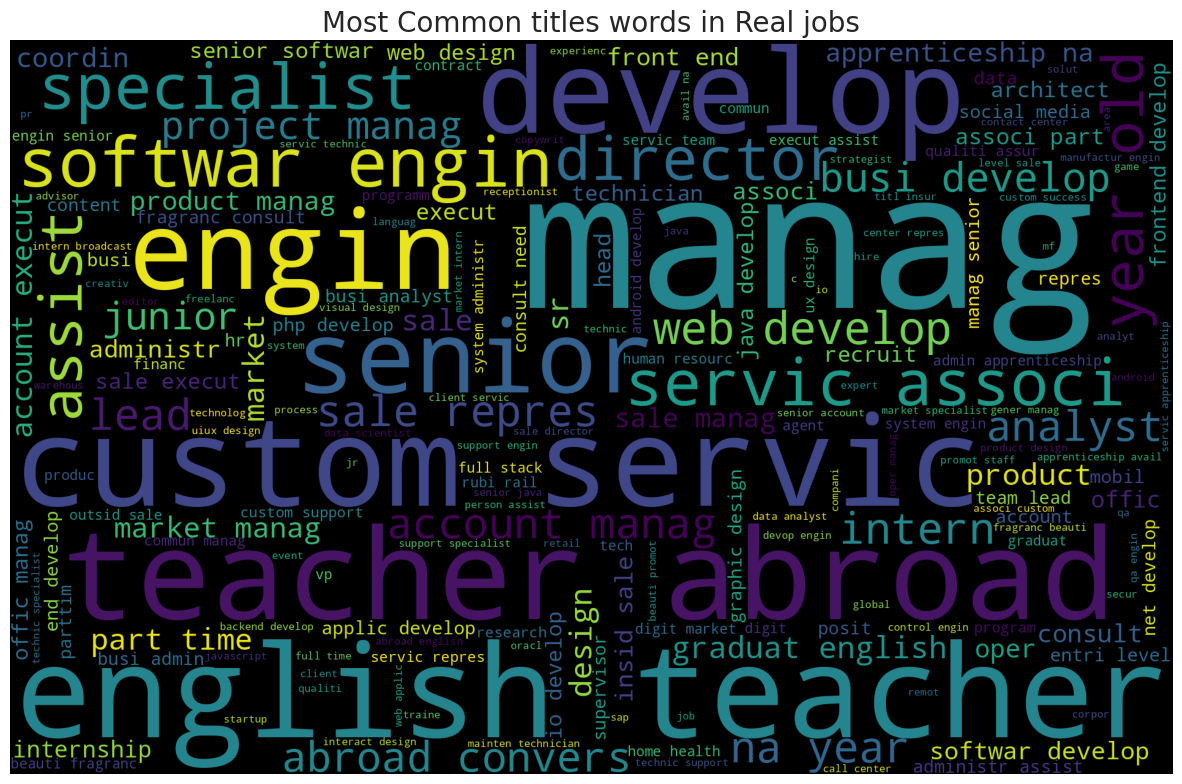

In [40]:
plt.figure(figsize=(15,10))
wordcloudnotfraud=WordCloud(width = 1900 , height = 1200,background_color='black').generate(not_fraud_titles_corpus)
plt.axis('off')
plt.title('Most Common titles words in Real jobs',size=20)
plt.imshow(wordcloudnotfraud)

In [41]:
txt_fraud['benefits']=txt_fraud['benefits'].apply(column_clean)
txt_not_fraud['benefits']=txt_not_fraud['benefits'].apply(column_clean)

In [42]:
fraud_benefits = txt_fraud['benefits'].apply(combine)
not_fraud_benefits = txt_not_fraud['benefits'].apply(combine)

In [43]:
fraud_benefits_corpus=fraud_benefits.values.tolist()
not_fraud_benefits_corpus=not_fraud_benefits.values.tolist()

In [44]:
fraud_benefits_corpus=' '.join(fraud_benefits_corpus)
not_fraud_benefits_corpus=' '.join(not_fraud_benefits_corpus)

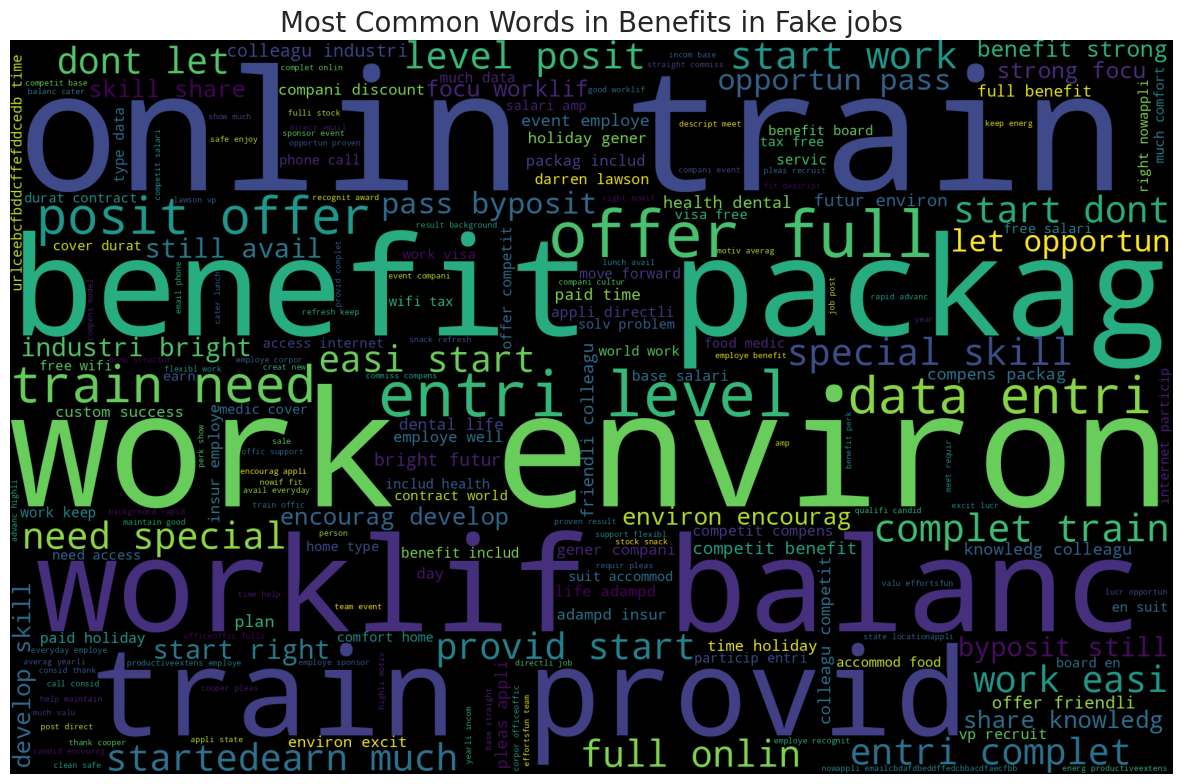

In [45]:
plt.figure(figsize=(15,10))
wordcloud_fraud_ben=WordCloud(width = 1900 , height = 1200,background_color='black').generate(fraud_benefits_corpus)
plt.axis('off')
plt.title('Most Common Words in Benefits in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_ben)

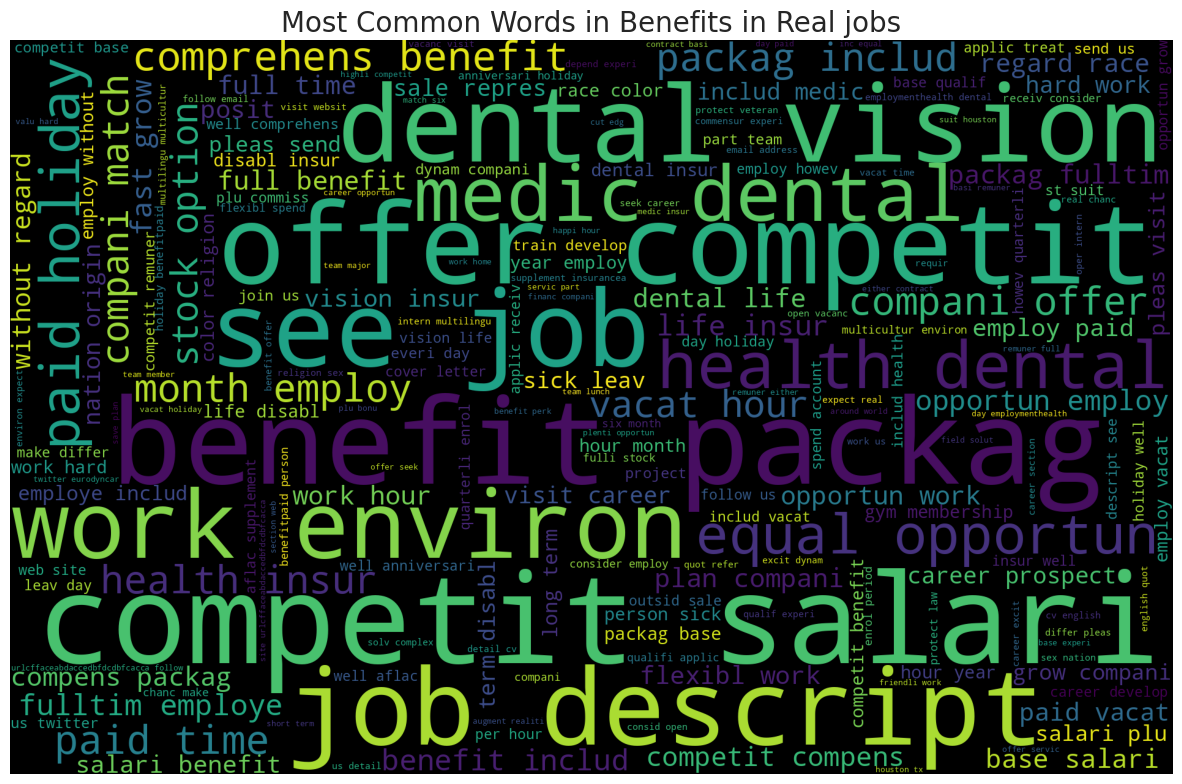

In [46]:
plt.figure(figsize=(15,10))
wordcloud_notfraudben=WordCloud(width = 1900 , height = 1200,background_color='black').generate(not_fraud_benefits_corpus)
plt.axis('off')
plt.title('Most Common Words in Benefits in Real jobs',size=20)
plt.imshow(wordcloud_notfraudben)

In [47]:
txt_fraud['company_profile']=txt_fraud['company_profile'].apply(column_clean)
txt_not_fraud['company_profile']=txt_not_fraud['company_profile'].apply(column_clean)

In [48]:
fraud_company = txt_fraud['company_profile'].apply(combine)
not_fraud_company = txt_not_fraud['company_profile'].apply(combine)

In [49]:
fraud_company_corpus=fraud_company.values.tolist()
not_fraud_company_corpus=not_fraud_company.values.tolist()

In [50]:
fraud_company_corpus=' '.join(fraud_company_corpus)
not_fraud_company_corpus=' '.join(not_fraud_company_corpus)

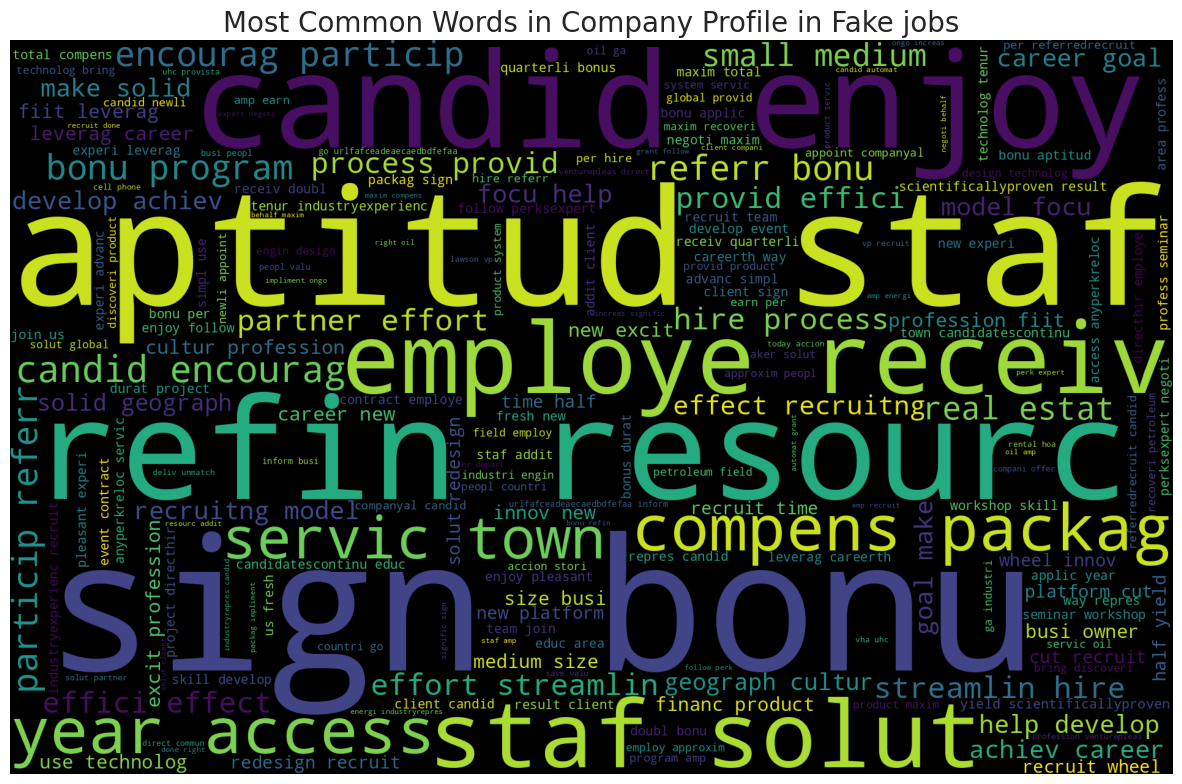

In [51]:
plt.figure(figsize=(15,10))
wordcloud_fraud_company=WordCloud(width = 1900 , height = 1200,background_color='black').generate(fraud_company_corpus)
plt.axis('off')
plt.title('Most Common Words in Company Profile in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_company)

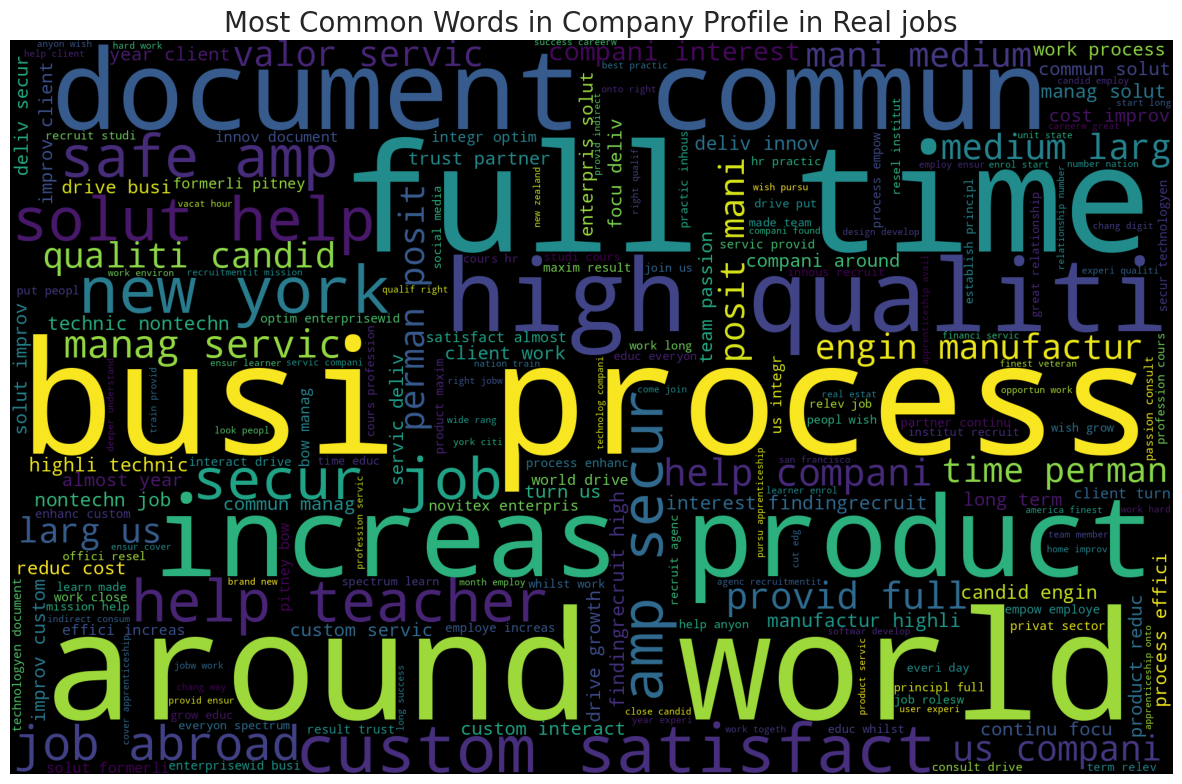

In [52]:
plt.figure(figsize=(15,10))
wordcloud_not_fraud_company=WordCloud(width = 1900 , height = 1200,background_color='black').generate(not_fraud_company_corpus)
plt.axis('off')
plt.title('Most Common Words in Company Profile in Real jobs',size=20)
plt.imshow(wordcloud_not_fraud_company)

In [53]:
txt_fraud['requirements']=txt_fraud['requirements'].apply(column_clean)
txt_not_fraud['requirements']=txt_not_fraud['requirements'].apply(column_clean)

In [54]:
fraud_requirements = txt_fraud['requirements'].apply(combine)
not_fraud_requirements = txt_not_fraud['requirements'].apply(combine)

In [55]:
fraud_requirements_corpus=fraud_requirements.values.tolist()
not_fraud_requirements_corpus=not_fraud_requirements.values.tolist()

In [56]:
# Corpus for WordCloud
fraud_requirements_corpus=' '.join(fraud_requirements_corpus)
not_fraud_requirements_corpus=' '.join(not_fraud_requirements_corpus)

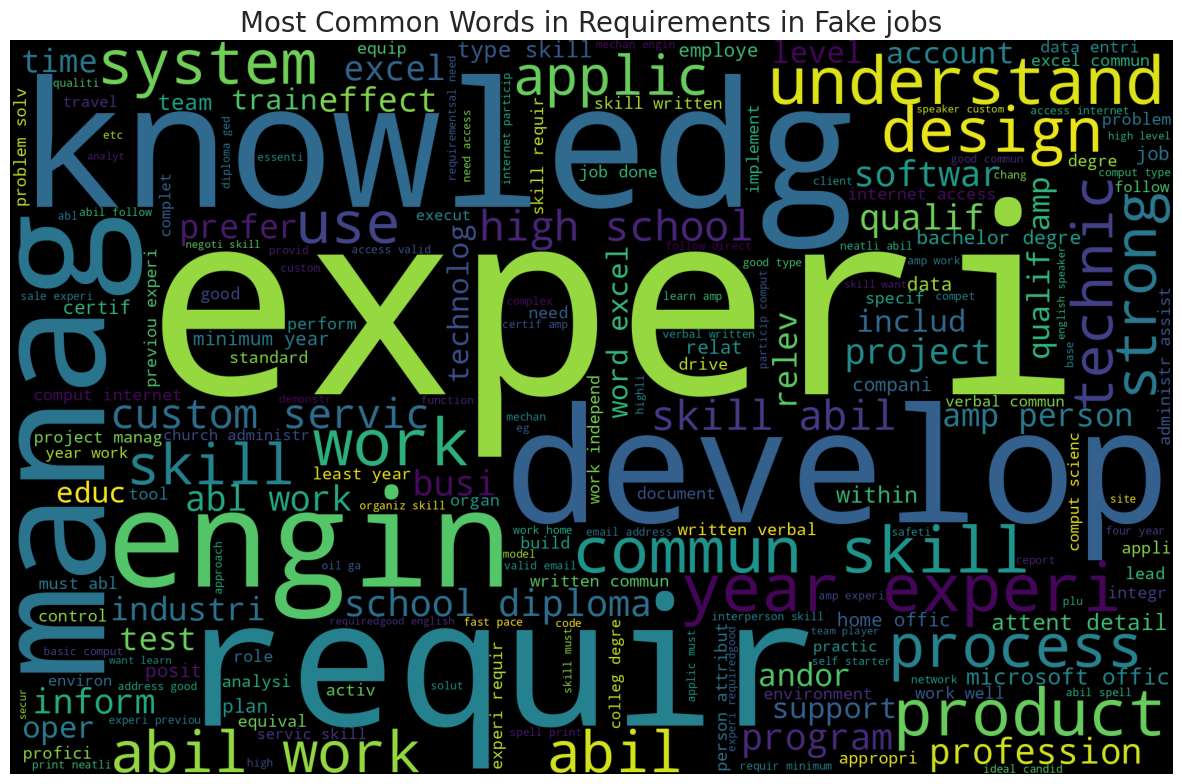

In [57]:
plt.figure(figsize=(15,10))
wordcloud_fraud_requirements=WordCloud(width = 1900 , height = 1200,background_color='black').generate(fraud_requirements_corpus)
plt.axis('off')
plt.title('Most Common Words in Requirements in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_requirements)

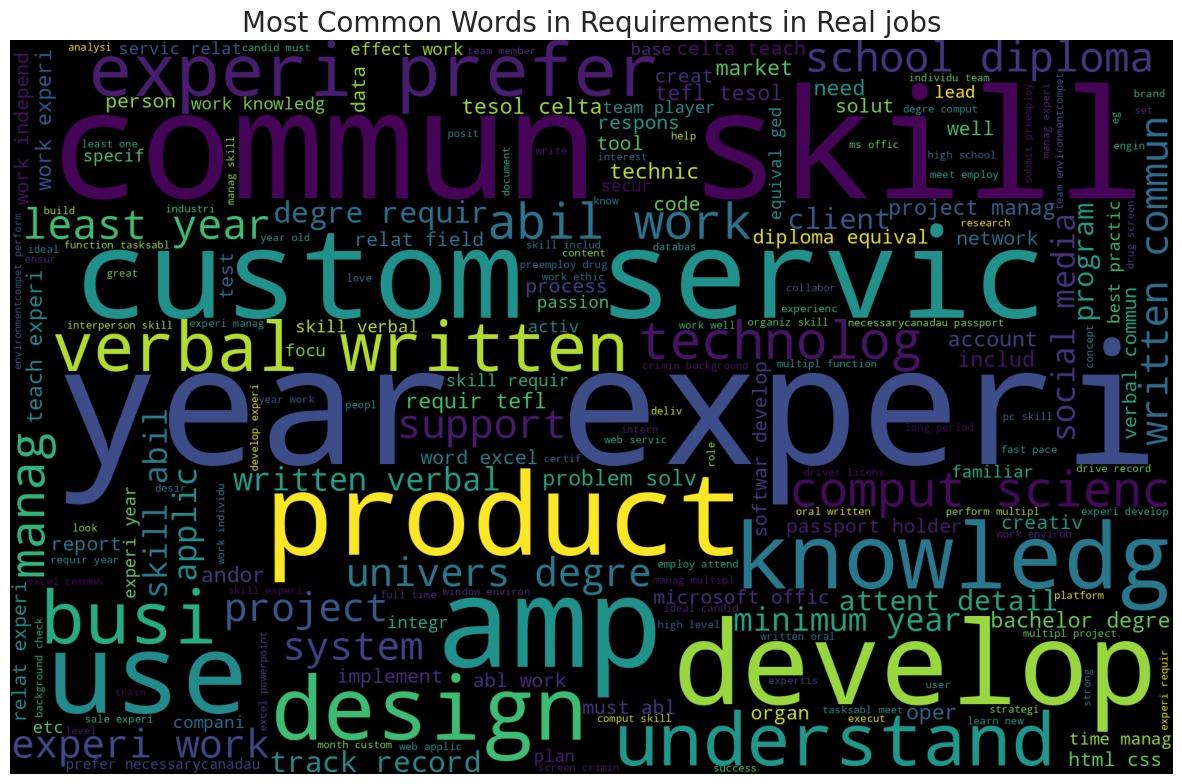

In [58]:
plt.figure(figsize=(15,10))
wordcloud_notfraud_requirements=WordCloud(width = 1900 , height = 1200,background_color='black').generate(not_fraud_requirements_corpus)
plt.axis('off')
plt.title('Most Common Words in Requirements in Real jobs',size=20)
plt.imshow(wordcloud_notfraud_requirements)

In [59]:
data=txt_cols.join(categ_cols.drop(columns='fraudulent'))

In [60]:
data['text']=data['title'] +' '+data['benefits']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']
columns=['title','benefits','company_profile','description','requirements']
data.drop(columns=columns,inplace=True)

In [61]:
data['text']=data['text'].apply(column_clean)
data['text']=data['text'].apply(combine)

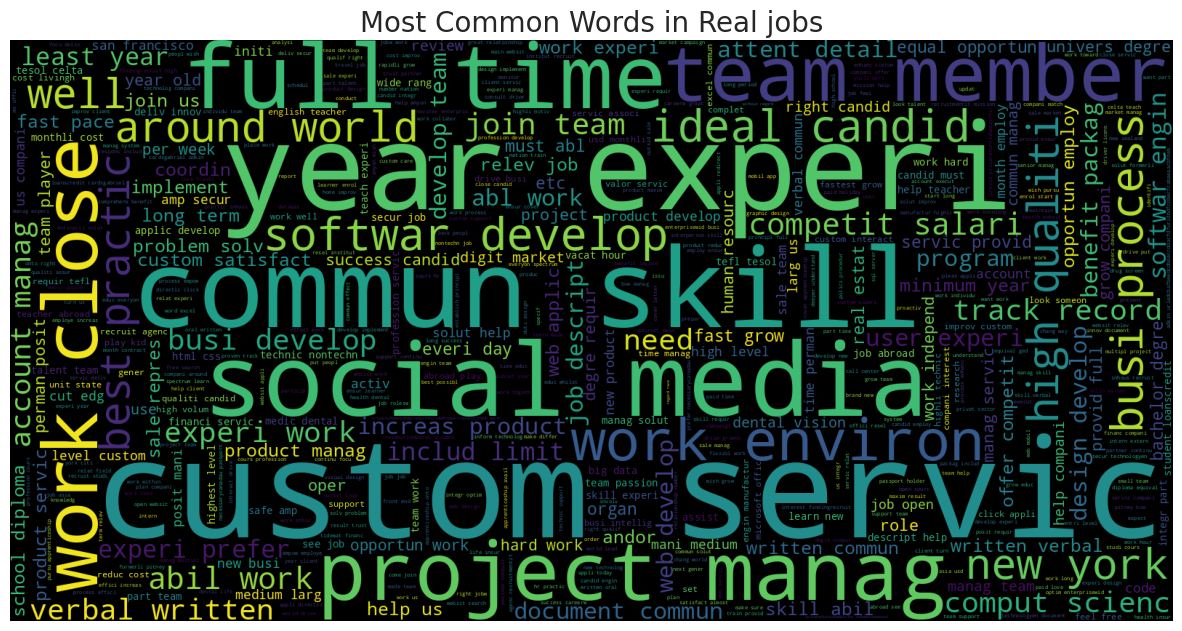

In [62]:
plt.figure(figsize = (15,10))
wordcloud_real = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='black').generate(" ".join(data[data['fraudulent'] == 0]['text']))
plt.axis('off')
plt.title('Most Common Words in Real jobs',size=20)
plt.imshow(wordcloud_real)

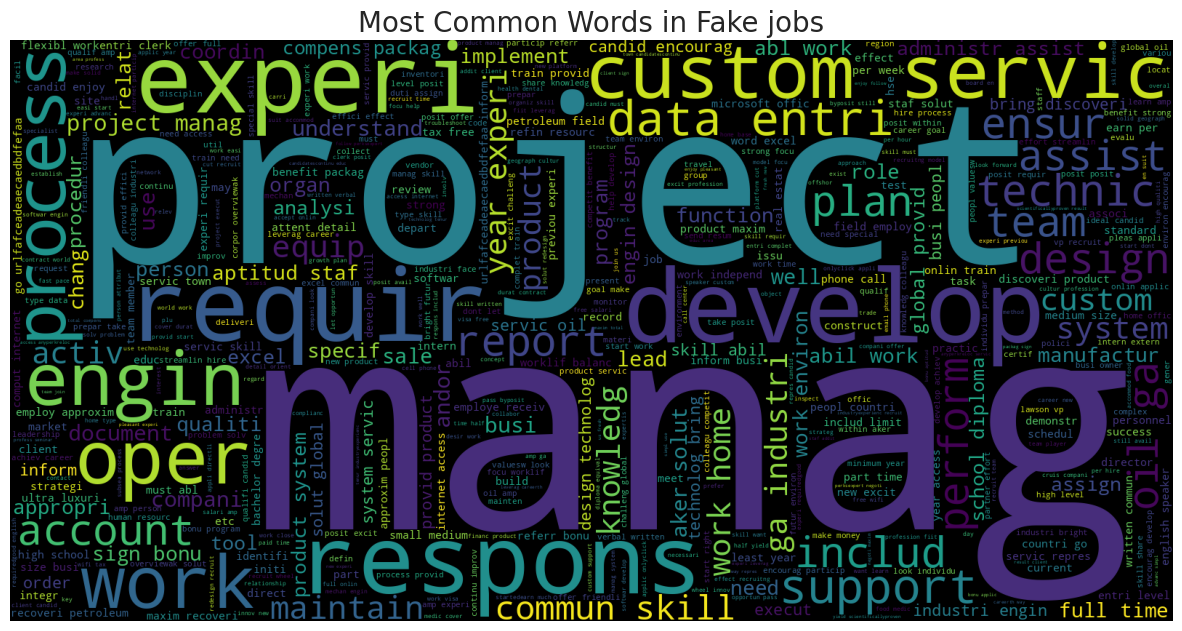

In [63]:
plt.figure(figsize = (15,10))
wordcloud_fake = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='black').generate(" ".join(data[data['fraudulent'] == 1]['text']))
plt.axis('off')
plt.title('Most Common Words in Fake jobs',size=20)
plt.imshow(wordcloud_fake)

**Forming dependent and independent variables' data**

In [64]:
x=data.drop(columns='fraudulent')
y=data['fraudulent']

In [65]:
count_vec = CountVectorizer(max_features=5000)
vec = count_vec.fit_transform(data['text'])
#CountVectorizer used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [66]:
text=pd.DataFrame(vec.toarray(),columns=count_vec.get_feature_names_out())

In [67]:
labels=pd.get_dummies(x.drop(columns='text'))
result = pd.concat([labels, text], axis=1)

In [68]:
#machine learning preprocessing & classification models
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score,accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [69]:
# Splitting data to train and test
x_train,x_test,y_train,y_test=train_test_split(result,y,test_size=0.2,random_state=42,stratify=y)

## **Building models for evaluation**

In [70]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_y_pred=lr.predict(x_test)

Training Classification report for Logistic Regression 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      0.99      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

Testing Classification Report for Logistion Regression 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.90      0.80      0.85       173

    accuracy                           0.99      3576
   macro avg       0.95      0.90      0.92      3576
weighted avg       0.99      0.99      0.99      3576

Confusion Matrix for Testing Logistic Regression 



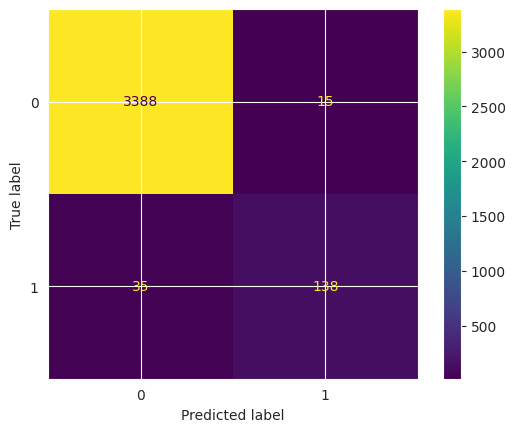

In [71]:
print('Training Classification report for Logistic Regression \n',classification_report(y_train,lr.predict(x_train)))
print('Testing Classification Report for Logistion Regression \n',classification_report(y_test,lr_y_pred))
print('Confusion Matrix for Testing Logistic Regression \n')
cm = confusion_matrix(y_test, lr_y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
plt.show()

In [72]:
# K Nearest Neighbours
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_y_pred=knn.predict(x_test)

Training Classification report for KNN 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      0.99      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

Testing Classification Report for KNN 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      3403
           1       0.52      0.76      0.62       173

    accuracy                           0.95      3576
   macro avg       0.75      0.86      0.80      3576
weighted avg       0.97      0.95      0.96      3576

Confusion Matrix for Testing KNN 



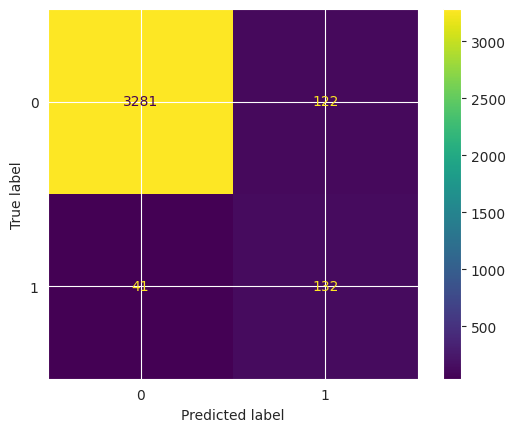

In [73]:
print('Training Classification report for KNN \n',classification_report(y_train,lr.predict(x_train)))
print('Testing Classification Report for KNN \n',classification_report(y_test,knn_y_pred))
print('Confusion Matrix for Testing KNN \n')
cm = confusion_matrix(y_test, knn_y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()
plt.show()

In [74]:
# DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_y_pred=dt.predict(x_test)

Training Classification report for Decision Tree Classifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

Testing Classification Report for Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.76      0.73      0.74       173

    accuracy                           0.98      3576
   macro avg       0.87      0.86      0.87      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix for Testing Decision Tree Classifier



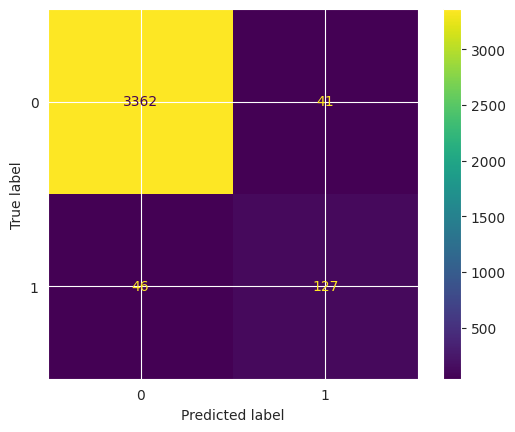

In [75]:
print('Training Classification report for Decision Tree Classifier \n',classification_report(y_train,dt.predict(x_train)))
print('Testing Classification Report for Decision Tree Classifier \n',classification_report(y_test,dt_y_pred))
print('Confusion Matrix for Testing Decision Tree Classifier\n')
cm = confusion_matrix(y_test, dt_y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()
plt.show()

In [76]:
#AdaBoost Classifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
ada_y_pred=ada.predict(x_test)

Training Classification report for AdaBoost Classifier 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     13611
           1       0.80      0.56      0.66       693

    accuracy                           0.97     14304
   macro avg       0.89      0.78      0.82     14304
weighted avg       0.97      0.97      0.97     14304

Testing Classification Report for AdaBoost Classifier 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3403
           1       0.82      0.57      0.67       173

    accuracy                           0.97      3576
   macro avg       0.90      0.78      0.83      3576
weighted avg       0.97      0.97      0.97      3576

Confusion Matrix for Testing AdaBoost Classifier



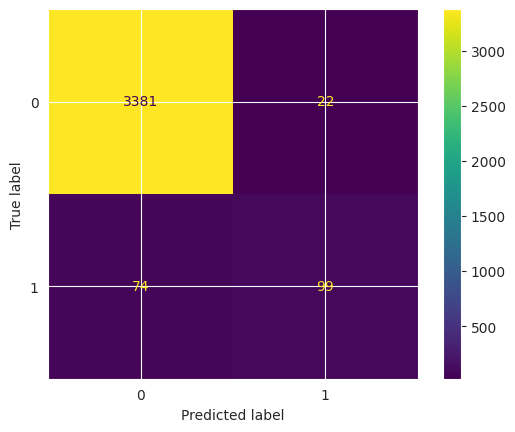

In [77]:
print('Training Classification report for AdaBoost Classifier \n',classification_report(y_train,ada.predict(x_train)))
print('Testing Classification Report for AdaBoost Classifier \n',classification_report(y_test,ada_y_pred))
print('Confusion Matrix for Testing AdaBoost Classifier\n')
cm = confusion_matrix(y_test, ada_y_pred, labels=ada.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ada.classes_)
disp.plot()
plt.show()

In [78]:
# Random Forest Classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_y_pred=rf.predict(x_test)

Training Classification report for Random Forest Classifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

Testing Classification Report for Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.59      0.74       173

    accuracy                           0.98      3576
   macro avg       0.99      0.79      0.87      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix for Testing Random Foresr Classifier



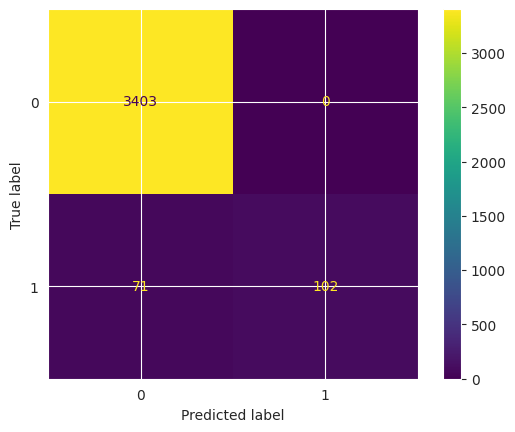

In [79]:
print('Training Classification report for Random Forest Classifier \n',classification_report(y_train,rf.predict(x_train)))
print('Testing Classification Report for Random Forest Classifier \n',classification_report(y_test,rf_y_pred))
print('Confusion Matrix for Testing Random Foresr Classifier\n')
cm = confusion_matrix(y_test, rf_y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()
plt.show()

In [80]:
#Support Vector Machine
svc=SVC()
svc.fit(x_train,y_train)
svc_y_pred=svc.predict(x_test)

Training Classification report for Support Vector Machine 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     13611
           1       1.00      0.66      0.79       693

    accuracy                           0.98     14304
   macro avg       0.99      0.83      0.89     14304
weighted avg       0.98      0.98      0.98     14304

Testing Classification Report for Support Vector Machine 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.59      0.74       173

    accuracy                           0.98      3576
   macro avg       0.99      0.79      0.87      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix for Support Vector Classifier



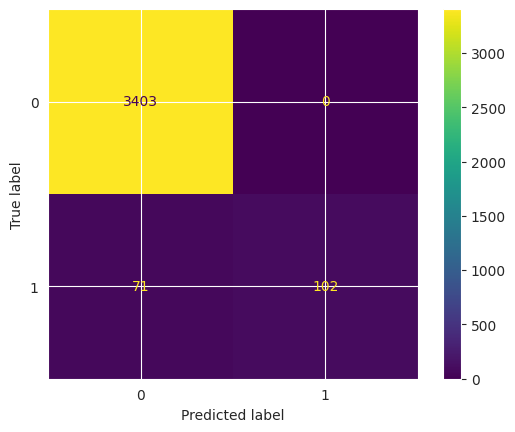

In [81]:
print('Training Classification report for Support Vector Machine \n',classification_report(y_train,svc.predict(x_train)))
print('Testing Classification Report for Support Vector Machine \n',classification_report(y_test,svc_y_pred))
print('Confusion Matrix for Support Vector Classifier\n')
cm = confusion_matrix(y_test, svc_y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot()
plt.show()